In [23]:
#Ejercicio 1
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sc.parallelize(list(data)).take(5)

[0, 1, 2, 3, 4]

In [5]:
#Ejercicio 2
import pandas as pd
import numpy as np
data2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
def potencia(data2):
    return [x**3 for x in data2]
potencia(data2)
df = pd.DataFrame(potencia(data2))
print(df)

      0
0     1
1     8
2    27
3    64
4   125
5   216
6   343
7   512
8   729
9  1000


In [33]:
#Ejercicio 3
data3 = potencia(data2)
print(data3)
def par(data3):
    enum = []
    for n in data3:
        if n % 2 == 0:
            enum.append(n)
    return enum
par(data3)

[1, 8, 27, 64, 125, 216, 343, 512, 729, 1000]


[8, 64, 216, 512, 1000]

In [41]:
#Ejercicio 4
import random
numeros = random.sample(range(1, 20000), 10000)
print(numeros)

[18264, 9849, 7083, 10396, 7289, 7662, 8141, 6267, 15678, 15281, 11323, 9072, 11475, 9650, 12198, 17678, 11594, 435, 2237, 18701, 14492, 16237, 7686, 9779, 13304, 13229, 9025, 17372, 14294, 12886, 15168, 12908, 5289, 11252, 8557, 7482, 19316, 16420, 1472, 10272, 9362, 18813, 8978, 12766, 13477, 6781, 15953, 7544, 2984, 925, 7960, 16970, 8865, 16611, 8162, 18132, 19498, 14119, 10018, 2611, 15501, 10060, 14528, 9936, 7460, 10208, 8191, 16115, 13587, 11418, 18273, 12199, 9805, 17882, 3791, 9606, 4394, 13283, 14853, 18031, 12834, 18483, 7531, 14094, 5563, 10911, 19403, 8642, 8317, 19912, 17361, 16798, 15245, 2943, 8707, 19399, 19712, 9350, 4558, 4696, 874, 11918, 15239, 10689, 1352, 12605, 19921, 11425, 13685, 15680, 4460, 1456, 8511, 3514, 16369, 5564, 17732, 4228, 14359, 4741, 9340, 3945, 19327, 8810, 16549, 5410, 2892, 19176, 19738, 4638, 8734, 18012, 5259, 2520, 5526, 18869, 17330, 19891, 10014, 8684, 16734, 10091, 7845, 1099, 7424, 906, 18103, 3125, 11403, 18519, 888, 11979, 10170, 13

In [45]:
#Ejercicio 5
granos = 1
for square in range(1, 64+1):
    granos = 2** (square - 1)
    print(granos)

1
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
65536
131072
262144
524288
1048576
2097152
4194304
8388608
16777216
33554432
67108864
134217728
268435456
536870912
1073741824
2147483648
4294967296
8589934592
17179869184
34359738368
68719476736
137438953472
274877906944
549755813888
1099511627776
2199023255552
4398046511104
8796093022208
17592186044416
35184372088832
70368744177664
140737488355328
281474976710656
562949953421312
1125899906842624
2251799813685248
4503599627370496
9007199254740992
18014398509481984
36028797018963968
72057594037927936
144115188075855872
288230376151711744
576460752303423488
1152921504606846976
2305843009213693952
4611686018427387904
9223372036854775808


In [66]:
#Ejercicio 6
x = sc.textFile("lista.txt")
x2 = x.map(lambda x:x.lower())
x2.collect()

['territorio',
 'alacena',
 'variación',
 'peticiones',
 'mina',
 'cueva',
 'pensamiento',
 'interés',
 'acciones',
 'cambios',
 'leyendas']

In [73]:
#Ejercicio 7
nPalabras = x.count()
print (nPalabras)

11


In [77]:
#Ejercicio 8
total= 0
rdd = sc.textFile('celestina.txt')
for line in rdd.collect():
    finded = line.find('Celestina')
    if finded != -1 and finded != 0:
        total += 1
print(total)

3


In [170]:
#Ejercicio 9
nume = []
for n in x2.collect():
    nume.append(int(n.count('e')))
nuevo = nume
sum(nuevo)

11

In [3]:
#Ejercicio 11
myList = [(1970, -14), (1980, -15), (1990, -16), (2000, 18), (2010, 20)]
rddTemp = sc.parallelize(myList).collect()
for i in rddTemp:
    FA = i[1]*9/5+32
    print(i[0], FA)

1970 6.800000000000001
1980 5.0
1990 3.1999999999999993
2000 64.4
2010 68.0


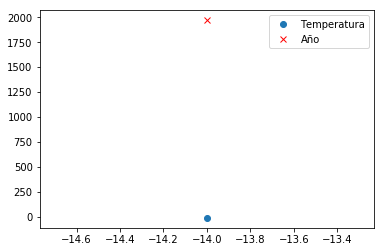

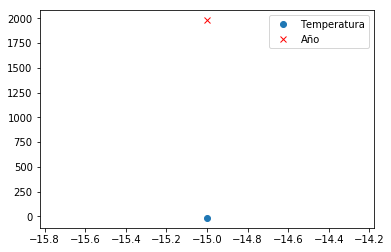

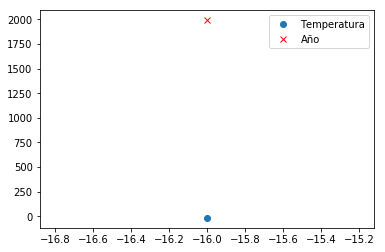

In [199]:
#Ejercicios 12 y 13
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
for u in rddTemp:
    if u[1]<0:
        d = {'Temperatura': u[1], 'Año': u[0]}
        dfTemp = pd.DataFrame(d, index=[u[1]])
        dfTemp.plot(style=['o', 'rx'])

In [205]:
#Ejercicio 14
Temps = [14, -2, 30, 42, -14, 21, 12, 9, 36]
def Media(Temps):
    return sum(Temps) / len(Temps)
Media(Temps)

16.444444444444443

In [213]:
#Ejercicio 15
Lista = [('Alemania', 23), ('España', 21), ('Bélgica', 24), ('Holanda', 19), ('Italia', 20)]
rddIVA = sc.parallelize(Lista).collect()
for q in rddIVA:
    newIVA = q[1]+2
    print(q[0], newIVA)

Alemania 25
España 23
Bélgica 26
Holanda 21
Italia 22


In [238]:
#Ejercicio 16
ListProhibida = ['luz', 'hacer', 'oscuridad', 'noche', 'como']
total2 = 0
rddTexto = sc.textFile('texto.txt')
for z in rddTexto.collect():
    for y in ListProhibida:
        buscar = z.find(y)
        if buscar != -1 and buscar != 0:
            total2 += 1
            print (z.replace(y, 'tabu!'))
print(total2)       

En tabu! y oscuridad, pero lo que no nos damos cuenta
En luz y tabu!, pero lo que no nos damos cuenta
Es que no puede existir tabu! sin oscuridad, paz sin guerra, bien sin mal
Es que no puede existir luz sin tabu!, paz sin guerra, bien sin mal
No rechaces tu oscuridad, abrázala y crea tabu! desde ella
No rechaces tu tabu!, abrázala y crea luz desde ella
6


In [258]:
#Ejercicios 17
total3= 0
rddOtro = sc.textFile('celestina.txt')
def Contador1(str):
    uniq = set(str)
    li = list(str)
    dict = {}
    for key in uniq:
        dict[key] = str.count(key)
    return dict
contador = rddOtro.map(lambda x:Contador1(x)).zipWithIndex().collect()
print(contador)

[({'i': 1, 'r': 2, 'd': 3, 'c': 2, 'l': 4, 'h': 1, 'm': 3, 'í': 2, 'á': 1, 'L': 1, 'o': 5, 'a': 6, ' ': 13, 'u': 2, 'e': 11, 'n': 4, 'b': 1, 'q': 1, 't': 5, 's': 5, 'C': 1}, 0), ({'r': 7, 'i': 2, 'p': 3, 'd': 4, ',': 2, 'y': 1, 'l': 1, 'm': 3, 'á': 1, 'o': 5, 'a': 7, 'g': 1, ' ': 12, 'u': 1, 'e': 6, 'n': 4, 'b': 1, 't': 2, 'N': 1, 's': 2}, 1), ({'r': 4, 'i': 3, 'p': 1, 'd': 3, 'c': 1, ',': 2, 'l': 1, 'y': 1, 'P': 1, 'z': 1, 'á': 1, 'o': 2, 'a': 9, 'f': 1, ' ': 11, 'e': 7, 'u': 3, 'n': 5, 'q': 1, 't': 1, 's': 2, 'v': 1, 'C': 1}, 2), ({'r': 1, 'd': 5, 'c': 1, ',': 1, 'l': 5, 'y': 1, 'm': 1, 'z': 1, 'á': 1, 'o': 4, 'a': 7, 'g': 1, ' ': 17, 'u': 3, 'e': 11, 'q': 2, 'n': 1, 'j': 1, 't': 1, 'N': 1, 's': 5, 'v': 2}, 3), ({'r': 4, 'i': 3, 'p': 1, 'd': 4, 'c': 1, ',': 2, 'l': 3, 'm': 1, 'í': 1, 'á': 1, 'o': 2, 'a': 5, 'g': 1, 'T': 1, ' ': 9, 'u': 2, 'e': 10, 'n': 3, 'q': 1, 't': 4, 's': 5, 'C': 1}, 4)]


In [342]:
#Ejercicio 18
ListHobbies=[('Luis', 'Ajedrez'), ('Avelino', 'Programar'), ('Pepe', 'Beber'), ('Ana', 'Futbol'), ('Laura', 'Leer'), ('Patricia', 'Coches'), ('Paula', )]
rddHobbies=sc.parallelize(ListHobbies).collect()
for e in rddHobbies:
    print(e)

('Luis', 'Ajedrez')
('Avelino', 'Programar')
('Pepe', 'Beber')
('Ana', 'Futbol')
('Laura', 'Leer')
('Patricia', 'Coches')
('Paula',)


In [350]:
#Ejercicio 19
rddWarns = sc.textFile('mongod.log')
for mongo in rddWarns.collect():
    buscador = mongo.find('WARNING')
    if buscador != -1 and buscador != 0:
        print(mongo)

2018-11-29T23:41:18.967+0100 I CONTROL  [initandlisten] MongoDB starting : pid=4417 port=27017 dbpath=/var/lib/mongodb 64-bit host=Avelino
2018-11-29T23:41:18.967+0100 I CONTROL  [initandlisten] db version v4.0.4
2018-11-29T23:41:18.967+0100 I CONTROL  [initandlisten] git version: f288a3bdf201007f3693c58e140056adf8b04839
2018-11-29T23:41:18.968+0100 I CONTROL  [initandlisten] OpenSSL version: OpenSSL 1.1.0f  25 May 2017
2018-11-29T23:41:18.968+0100 I CONTROL  [initandlisten] allocator: tcmalloc
2018-11-29T23:41:18.968+0100 I CONTROL  [initandlisten] modules: none
2018-11-29T23:41:18.968+0100 I CONTROL  [initandlisten] build environment:
2018-11-29T23:41:18.968+0100 I CONTROL  [initandlisten]     distmod: debian92
2018-11-29T23:41:18.968+0100 I CONTROL  [initandlisten]     distarch: x86_64
2018-11-29T23:41:18.968+0100 I CONTROL  [initandlisten]     target_arch: x86_64
2018-11-29T23:41:18.968+0100 I CONTROL  [initandlisten] options: { config: "/etc/mongod.conf", net: { bindIp: "127.0.0.1

In [351]:
#Ejercicio 20
rddWarns2 = sc.textFile('auth.log')
for auth in rddWarns2.collect():
    buscador2 = auth.find('FAILED')
    if buscador2 != -1 and buscador2 != 0:
        print(auth)
    print(auth)

Dec 30 12:17:01 Avelino CRON[3803]: pam_unix(cron:session): session opened for user root by (uid=0)
Dec 30 12:17:01 Avelino CRON[3803]: pam_unix(cron:session): session closed for user root
Dec 30 13:17:01 Avelino CRON[3890]: pam_unix(cron:session): session opened for user root by (uid=0)
Dec 30 13:17:01 Avelino CRON[3890]: pam_unix(cron:session): session closed for user root
Dec 30 14:17:01 Avelino CRON[4047]: pam_unix(cron:session): session opened for user root by (uid=0)
Dec 30 14:17:01 Avelino CRON[4047]: pam_unix(cron:session): session closed for user root
Jan  1 19:17:01 Avelino CRON[5476]: pam_unix(cron:session): session opened for user root by (uid=0)
Jan  1 19:17:01 Avelino CRON[5476]: pam_unix(cron:session): session closed for user root
Jan  1 20:10:00 Avelino su[5755]: Successful su for root by avelino
Jan  1 20:10:00 Avelino su[5755]: + /dev/pts/1 avelino:root
Jan  1 20:10:00 Avelino su[5755]: pam_unix(su:session): session opened for user root by (uid=1000)
Jan  1 20:10:00 A

In [11]:
#Ejercicio 21
rddAir = sc.textFile('aeropuertos.csv')
for aire in rddAir.collect():
    buscador3 = aire.find('España')
    if buscador3 != -1 and buscador3 != 0:
        print(aire[:21].replace(',Es',' '), file=open('spanish.txt', 'a'))

In [30]:
#Ejercicio 22
from pyspark.sql import Row
def cortar(line):
    corte = line.split(",")
    return corte
def f(x):
    return(Row(Aeropuerto=x[0], Nombre=x[1], Ciudad=x[2], \
               Pais=x[3], Latitud=int(x[4]), Altitud=int(x[5]), \
               Longitud=int(x[6]), Zonahoraria=x[7]))
rddAir2 = sc.textFile('aeropuertos.csv').map(cortar).map(f).collect()
df2 = sqlContext.createDataFrame(rddAir2)
sqlContext.registerDataFrameAsTable(df2, "Aeropuertos")
df2.registerTempTable("Aeropuertos")
latitud = sqlContext.sql("Select Nombre, Latitud, Aeropuerto from Aeropuertos where Latitud > 40")
latitud.show()
latitud.write.csv('latitud.csv')

+--------+-------+----------+
|  Nombre|Latitud|Aeropuerto|
+--------+-------+----------+
|  Ruzyne|     60|       PRG|
|Heathrow|     70|       LHR|
|  Narita|     45|       NRT|
+--------+-------+----------+

